<a href="https://colab.research.google.com/github/AmadeusEsparza/Data-Science/blob/main/Hisotrial_de_Ingresos_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO: FUNDAMENTOS DE PROGRAMACIÓN**

Una vez visto el ***Módulo 1: Fundamentos de Programación***, se presentan la siguientes actividad para que el alumnado pueda poner a prueba lo aprendido dentro de cada clase.

Dentro de la siguiente dinámica, **realizar un menú CRUD + Lib** donde **se debe aplicar todos los temas vistos, desde Lenguaje de programación Python hasta Introducción a las librerías de Python**, el tema a emplear es libre, y la sección de librerías solo es mostrar su funcionamiento. Todo lo anterior haciendo uso de **Python**.

Cada función deberá ejecutar cada operación del CRUD:

*   **Ver agenda**
*   **Crear contacto**
*   **Consultar contacto**
*   **Actualizar contacto**
*   **Eliminar contacto**
*   **Numpy**
*   **Matplotlib**
*   **Salir**

// Utilize sys.exit() ya que no funcionaban los breaks.

**MENU**
1. Ver cuentas
2. Crear cuenta
3. Consultar cuenta
4. Actualizar cuenta
5. Eliminar cuenta
6. Registrar Ingreso
7. Convertir en matrices
8. Mostrar graficas
9. Salir
Ingrese una opción: 1
**MENU**
1. Ver cuentas
2. Crear cuenta
3. Consultar cuenta
4. Actualizar cuenta
5. Eliminar cuenta
6. Registrar Ingreso
7. Convertir en matrices
8. Mostrar graficas
9. Salir
Ingrese una opción: 2
Ingresa el nombre del contacto: Geovanni
Ingresa el apellido del contacto: Zepeda
Cuenta agregada: Geovanni
  name: Geovanni
  surname: Zepeda
  ingresos: []
  fechas: []
**MENU**
1. Ver cuentas
2. Crear cuenta
3. Consultar cuenta
4. Actualizar cuenta
5. Eliminar cuenta
6. Registrar Ingreso
7. Convertir en matrices
8. Mostrar graficas
9. Salir
Ingrese una opción: 1
Cuenta: Geovanni
  name: Geovanni
  surname: Zepeda
  ingresos: []
  fechas: []
**MENU**
1. Ver cuentas
2. Crear cuenta
3. Consultar cuenta
4. Actualizar cuenta
5. Eliminar cuenta
6. Registrar Ingreso
7. Convertir en matrices
8. Mostrar g

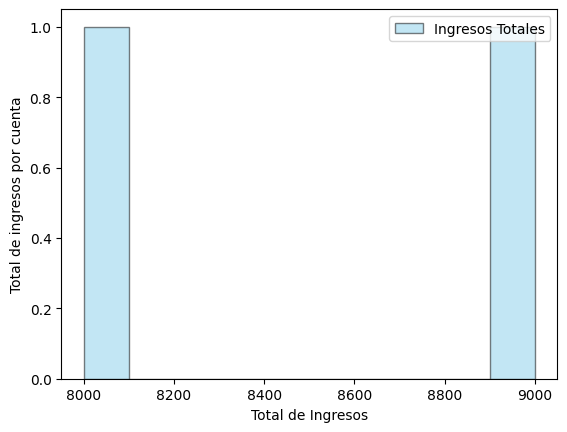

KeyboardInterrupt: Interrupted by user

In [ ]:
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt

accounts = {}

def show_menu():
    print("**MENU**")
    print("1. Ver cuentas")
    print("2. Crear cuenta")
    print("3. Consultar cuenta")
    print("4. Actualizar cuenta")
    print("5. Eliminar cuenta")
    print("6. Registrar Ingreso")
    print("7. Convertir en matrices")
    print("8. Mostrar graficas")
    print("9. Salir")

    option = int(input("Ingrese una opción: "))
    return option

def execute_option(option):
    if option == 1:
        show_accounts()
    elif option == 2:
        create_account()
    elif option == 3:
        search_account()
    elif option == 4:
        update_account()
    elif option == 5:
        delete_account()
    elif option == 6:
        register_income()
    elif option == 7:
        convert_to_matrix()
    elif option == 8:
        show_data_analysis()
    elif option == 9:
        print("Saliendo del sistema...")
        sys.exit()
    else:
        print("Opción inválida.")

def show_accounts():
    global accounts
    for account, details in accounts.items():
        print(f"Cuenta: {account}")
        for key, value in details.items():
            print(f"  {key}: {value}")

def create_account():
    global accounts
    account_id = input('Ingresa el nombre del contacto: ')
    account_surname = input('Ingresa el apellido del contacto: ')

    accounts[account_id] = {'name': account_id, 'surname': account_surname, 'ingresos': [], 'fechas': []}
    print(f"Cuenta agregada: {account_id}")
    for key, value in accounts[account_id].items():
        print(f"  {key}: {value}")

def search_account():
    global accounts
    account_id = input('Ingresa el nombre de la cuenta: ')

    if account_id in accounts:
        cuenta = accounts[account_id]
        print(cuenta)
    else:
        print('La cuenta no existe.')

def update_account():
    global accounts
    account_id = input('Ingresa el nombre de la cuenta a reemplazar: ')

    if account_id in accounts:
        replace_new_account_id = input('Ingresa el nuevo nombre de la cuenta: ')
        replace_new_surname = input('Ingresa el nuevo apellido: ')

        del accounts[account_id]
        accounts[replace_new_account_id] = {'name': replace_new_account_id, 'surname': replace_new_surname, 'ingresos': [], 'fechas': []}
        print("Cuenta reemplazada exitosamente.")
    else:
        print('La cuenta no existe.')

def delete_account():
    global accounts
    account_id = input('Ingresa el nombre de la cuenta: ')

    if account_id in accounts:
        del accounts[account_id]
        print(f"Cuenta '{account_id}' eliminada.")
    else:
        print('La cuenta no existe.')

def register_income():
    global accounts
    account_id = input('Ingresa el nombre de la cuenta: ')

    if account_id in accounts:
        cantidad = float(input("Ingrese el monto: "))
        fecha_de_ingreso = input("Ingrese la fecha del ingreso (YYYY-MM-DD): ")
        fecha = datetime.datetime.strptime(fecha_de_ingreso, "%Y-%m-%d")

        accounts[account_id]['ingresos'].append(cantidad)
        accounts[account_id]['fechas'].append(fecha)
        print(f"Ingreso de ${cantidad} registrado en la cuenta '{account_id}' el {fecha}.")
    else:
        print(f"La cuenta '{account_id}' no existe.")

def convert_to_matrix():
    global accounts
    if not accounts:
        print("No hay datos para convertir.")
        return None

    account_names = list(accounts.keys())
    total_ingresos = [sum(details['ingresos']) for details in accounts.values()]
    data_matrix = np.array(list(zip(account_names, total_ingresos)))
    return data_matrix

def show_data_analysis():
    data_matrix = convert_to_matrix()
    if data_matrix is None:
        return

    plt.hist(data_matrix[:, 1].astype(float), bins=10, color='skyblue', alpha = 0.5, edgecolor='black', label = 'Ingresos Totales')
    plt.xlabel('Total de Ingresos')
    plt.ylabel('Total de ingresos por cuenta')
    plt.legend(loc = 'upper right')
    plt.show()

    account_id = input("Ingresa el nombre de la cuenta para ver ingresos a lo largo del tiempo: ")
    if account_id in accounts:
        fechas = accounts[account_id]['fechas']
        ingresos = accounts[account_id]['ingresos']

        plt.plot(fechas, ingresos, marker='o', linestyle='-', color='r')
        plt.xlabel('Ingresos')
        plt.ylabel('Fecha')
        plt.title(f'Ingresos a lo largo del tiempo: {account_id}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No hay ingresos registrados para la cuenta '{account_id}'.")



while True:
    option = show_menu()
    execute_option(option)

